#**Credit Card Default Risk**
#**Amarican express Challenge**




###**Import libraries and dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/machine learning data set/Amarican express dataset/train.csv')

###**Data Cleaning**

In [4]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [5]:
df.drop(['customer_id','name'],axis=1,inplace=True)

In [6]:
df.shape

(45528, 17)

In [7]:
X=df.drop(['credit_card_default'],axis=1)
Y=df['credit_card_default']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      45528 non-null  int64  
 1   gender                   45528 non-null  object 
 2   owns_car                 44981 non-null  object 
 3   owns_house               45528 non-null  object 
 4   no_of_children           44754 non-null  float64
 5   net_yearly_income        45528 non-null  float64
 6   no_of_days_employed      45065 non-null  float64
 7   occupation_type          45528 non-null  object 
 8   total_family_members     45445 non-null  float64
 9   migrant_worker           45441 non-null  float64
 10  yearly_debt_payments     45433 non-null  float64
 11  credit_limit             45528 non-null  float64
 12  credit_limit_used(%)     45528 non-null  int64  
 13  credit_score             45520 non-null  float64
 14  prev_defaults         

In [9]:
X.isnull().mean()

age                        0.000000
gender                     0.000000
owns_car                   0.012015
owns_house                 0.000000
no_of_children             0.017001
net_yearly_income          0.000000
no_of_days_employed        0.010170
occupation_type            0.000000
total_family_members       0.001823
migrant_worker             0.001911
yearly_debt_payments       0.002087
credit_limit               0.000000
credit_limit_used(%)       0.000000
credit_score               0.000176
prev_defaults              0.000000
default_in_last_6months    0.000000
dtype: float64

In [10]:
X.nunique()

age                           33
gender                         3
owns_car                       2
owns_house                     2
no_of_children                10
net_yearly_income          45502
no_of_days_employed         7874
occupation_type               19
total_family_members          10
migrant_worker                 2
yearly_debt_payments       45251
credit_limit               45371
credit_limit_used(%)         100
credit_score                 450
prev_defaults                  3
default_in_last_6months        2
dtype: int64

In [11]:
X.isnull().sum()

age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
dtype: int64

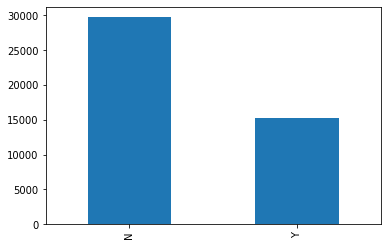

In [12]:
#fill null values of Own Car
X['owns_car'].value_counts().plot(kind='bar')

In [13]:
X['owns_car'].fillna(X['owns_car'].mode()[0],inplace=True)

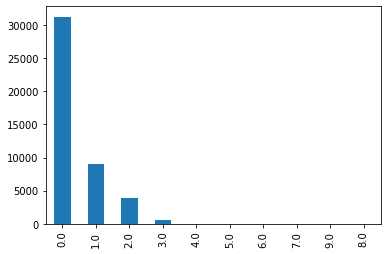

In [14]:
#fill null values of no of childrans
X['no_of_children'].value_counts().plot(kind='bar')

In [15]:
X['no_of_children'].fillna(X['no_of_children'].mode()[0],inplace=True)

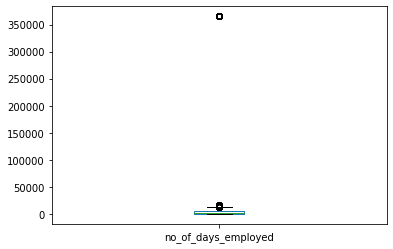

In [16]:
X['no_of_days_employed'].plot(kind='box')

In [17]:
X['no_of_days_employed'].fillna(X['no_of_days_employed'].median(),inplace=True)

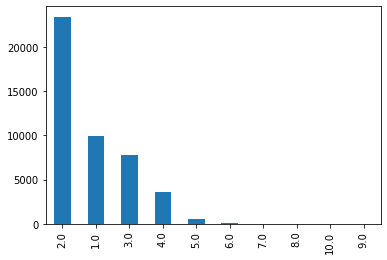

In [18]:
X['total_family_members'].value_counts().plot(kind='bar')

In [19]:
X['total_family_members'].fillna(X['total_family_members'].mode()[0],inplace=True)

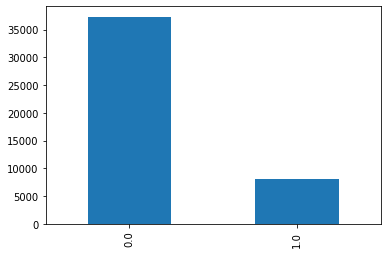

In [20]:
X['migrant_worker'].value_counts().plot(kind='bar')

In [21]:
X['migrant_worker'].fillna(X['migrant_worker'].mode()[0],inplace=True)

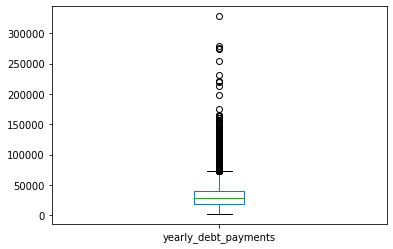

In [22]:
X['yearly_debt_payments'].plot(kind='box')

In [23]:
X['yearly_debt_payments'].fillna(X['yearly_debt_payments'].median(),inplace=True)

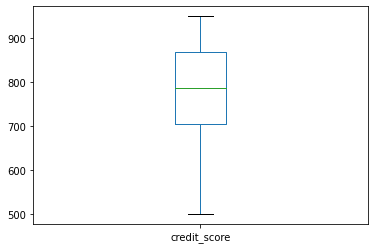

In [24]:
X['credit_score'].plot(kind='box')

In [25]:
X['credit_score'].fillna(X['credit_score'].median(),inplace=True)

##**Feature Selection**

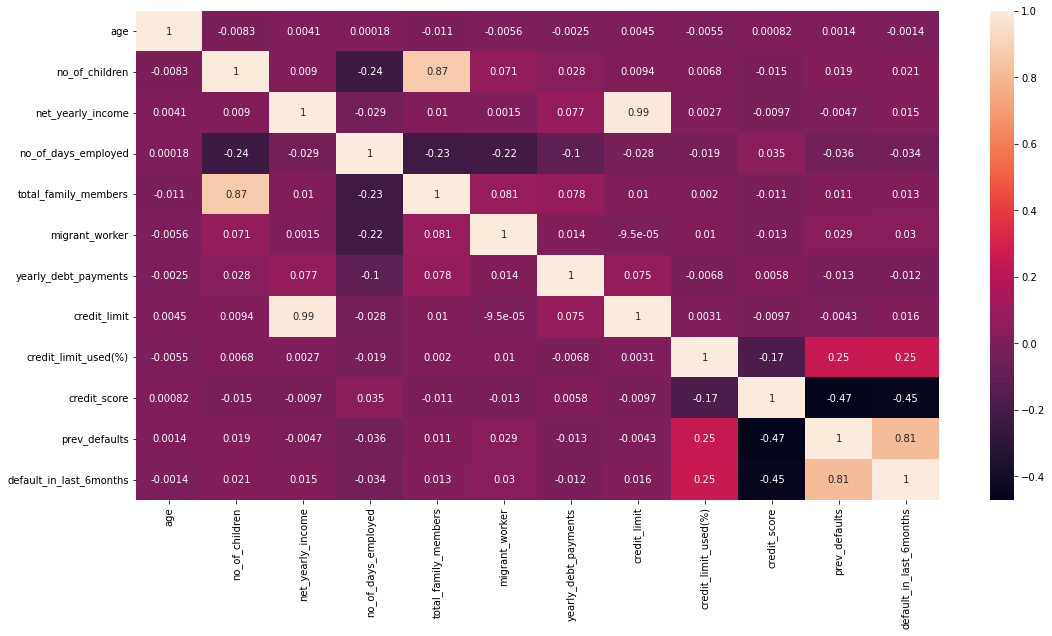

In [26]:
plt.figure(figsize = (18,9))
sns.heatmap(X.corr(),annot=True)

In [27]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [28]:
threshold=0.8
corr_feature=correlation(X,threshold)
corr_feature

{'credit_limit', 'default_in_last_6months', 'total_family_members'}

In [29]:
X.drop(corr_feature,axis=1,inplace=True)
X.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,migrant_worker,yearly_debt_payments,credit_limit_used(%),credit_score,prev_defaults
0,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,33070.28,73,544.0,2
1,29,M,N,Y,0.0,109862.62,2771.0,Laborers,0.0,15329.53,52,857.0,0
2,37,M,N,Y,0.0,230153.17,204.0,Laborers,0.0,48416.60,43,650.0,0
3,39,F,N,Y,0.0,122325.82,11941.0,Core staff,0.0,22574.36,20,754.0,0
4,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,0.0,38282.95,75,927.0,0


In [30]:
gender_ordinal_label = {k: i for i, k in enumerate(X['gender'].unique(), 0)}
print(gender_ordinal_label)
X['gender'] = X['gender'].map(gender_ordinal_label)

{'F': 0, 'M': 1, 'XNA': 2}


In [31]:
owns_car_ordinal_label = {k: i for i, k in enumerate(X['owns_car'].unique(), 0)}
print(owns_car_ordinal_label)
X['owns_car'] = X['owns_car'].map(owns_car_ordinal_label)

{'N': 0, 'Y': 1}


In [32]:
owns_house_ordinal_label = {k: i for i, k in enumerate(X['owns_house'].unique(), 0)}
print(owns_house_ordinal_label)
X['owns_house'] = X['owns_house'].map(owns_car_ordinal_label)

{'Y': 0, 'N': 1}


In [33]:
occupation_type_ordinal_label = {k: i for i, k in enumerate(X['occupation_type'].unique(), 0)}
print(occupation_type_ordinal_label)
X['occupation_type'] = X['occupation_type'].map(occupation_type_ordinal_label)

{'Unknown': 0, 'Laborers': 1, 'Core staff': 2, 'Accountants': 3, 'High skill tech staff': 4, 'Sales staff': 5, 'Managers': 6, 'Drivers': 7, 'Medicine staff': 8, 'Cleaning staff': 9, 'HR staff': 10, 'Security staff': 11, 'Cooking staff': 12, 'Waiters/barmen staff': 13, 'Low-skill Laborers': 14, 'Private service staff': 15, 'Secretaries': 16, 'Realty agents': 17, 'IT staff': 18}


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   45528 non-null  int64  
 1   gender                45528 non-null  int64  
 2   owns_car              45528 non-null  int64  
 3   owns_house            45528 non-null  int64  
 4   no_of_children        45528 non-null  float64
 5   net_yearly_income     45528 non-null  float64
 6   no_of_days_employed   45528 non-null  float64
 7   occupation_type       45528 non-null  int64  
 8   migrant_worker        45528 non-null  float64
 9   yearly_debt_payments  45528 non-null  float64
 10  credit_limit_used(%)  45528 non-null  int64  
 11  credit_score          45528 non-null  float64
 12  prev_defaults         45528 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 4.5 MB


In [35]:
X.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,migrant_worker,yearly_debt_payments,credit_limit_used(%),credit_score,prev_defaults
0,46,0,0,1,0.0,107934.04,612.0,0,1.0,33070.28,73,544.0,2
1,29,1,0,1,0.0,109862.62,2771.0,1,0.0,15329.53,52,857.0,0
2,37,1,0,1,0.0,230153.17,204.0,1,0.0,48416.60,43,650.0,0
3,39,0,0,1,0.0,122325.82,11941.0,2,0.0,22574.36,20,754.0,0
4,46,1,1,1,0.0,387286.00,1459.0,2,0.0,38282.95,75,927.0,0


##**Model**

In [36]:
#split data into training and test data with test data 20%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [37]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [38]:
#define classification models
def model(X_train,Y_train):
  #use logistic
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression()
  log.fit(X_train,Y_train)

  #use KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
  knn.fit(X_train,Y_train)

  #use SVC with linear kernal
  from sklearn.svm import SVC
  svc_lin=SVC(kernel='linear',random_state=0)
  svc_lin.fit(X_train,Y_train)

  #use SVC with rbf kernal
  from sklearn.svm import SVC
  svc_rbf=SVC(kernel='rbf',random_state=0)
  svc_rbf.fit(X_train,Y_train)

  #use decition Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(X_train,Y_train)

  #use random forest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  forest.fit(X_train,Y_train)

  #print the training accuracy of each model
  print('[0] Logistic regerssion training accuracy: ',log.score(X_train,Y_train))
  print('[1] KNN training accuracy: ',knn.score(X_train,Y_train))
  print('[2] SVC(linear kernal) training accuracy: ',svc_lin.score(X_train,Y_train))
  print('[3] SVC(rbf kernal) training accuracy: ',svc_rbf.score(X_train,Y_train))
  print('[4] Decition tree training accuracy: ',tree.score(X_train,Y_train))
  print('[5] Random forest training accuracy: ',forest.score(X_train,Y_train))


  return log,knn,svc_lin,svc_rbf,tree,forest


In [39]:
model=model(X_train,Y_train)

[0] Logistic regerssion training accuracy:  0.979353264185479
[1] KNN training accuracy:  0.9810372178157413
[2] SVC(linear kernal) training accuracy:  0.9803050640634533
[3] SVC(rbf kernal) training accuracy:  0.9803538743136059
[4] Decition tree training accuracy:  1.0
[5] Random forest training accuracy:  0.9978523489932886


In [41]:
#confusion matrix and test accuracy of every model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for i in range(len(model)):
  #confusion matirx
  cm=confusion_matrix(Y_test,model[i].predict(X_test))

  #accuracy
  TN,FP,FN,TP=confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
  test_score=(TP+TN)/(TN+TP+FN+FP)
  precision=precision_score(Y_test,model[i].predict(X_test))
  recall=recall_score(Y_test,model[i].predict(X_test))
  F1_Score=f1_score(Y_test,model[i].predict(X_test))

  print(cm)
  print('model[{}] testing accuracy ="{}"'.format(i,test_score))
  print('model[{}] precision ="{}"'.format(i,precision))
  print('model[{}] recall ="{}"'.format(i,recall))
  print('model[{}] F1_Score ="{}"'.format(i,F1_Score))
  print()


[[4176   25]
 [  75  277]]
model[0] testing accuracy ="0.9780364594772677"
model[0] precision ="0.9172185430463576"
model[0] recall ="0.7869318181818182"
model[0] F1_Score ="0.8470948012232417"

[[4190   11]
 [  81  271]]
model[1] testing accuracy ="0.9797935427190864"
model[1] precision ="0.9609929078014184"
model[1] recall ="0.7698863636363636"
model[1] F1_Score ="0.8548895899053628"

[[4201    0]
 [  85  267]]
model[2] testing accuracy ="0.9813309905556776"
model[2] precision ="1.0"
model[2] recall ="0.7585227272727273"
model[2] F1_Score ="0.8626817447495961"

[[4201    0]
 [  86  266]]
model[3] testing accuracy ="0.9811113551504502"
model[3] precision ="1.0"
model[3] recall ="0.7556818181818182"
model[3] F1_Score ="0.86084142394822"

[[4117   84]
 [  52  300]]
model[4] testing accuracy ="0.9701295848890841"
model[4] precision ="0.78125"
model[4] recall ="0.8522727272727273"
model[4] F1_Score ="0.8152173913043479"

[[4170   31]
 [  73  279]]
model[5] testing accuracy ="0.97715791785

In [52]:
model=model[2]

##**Prediction testing values**

In [53]:
df_test=pd.read_csv('/content/drive/MyDrive/machine learning data set/Amarican express dataset/test.csv')
df_test.shape

(11383, 18)

In [54]:
X_test1=df_test[X.columns]
print(X_test1.shape)
X_test1.head()

(11383, 13)


,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,migrant_worker,yearly_debt_payments,credit_limit_used(%),credit_score,prev_defaults
0,52,F,Y,N,0.0,232640.53,998.0,Unknown,0.0,14406.73,4,779.0,0
1,48,F,N,N,1.0,284396.79,1338.0,Unknown,0.0,57479.99,70,806.0,0
2,50,F,N,N,1.0,149419.28,1210.0,Unknown,0.0,21611.01,71,528.0,2
3,30,F,N,N,1.0,160437.54,503.0,Laborers,1.0,28990.76,9,815.0,0
4,52,M,N,Y,0.0,233480.37,157.0,Laborers,1.0,54213.72,82,613.0,1


In [55]:
X_test1.isnull().sum()

age                       0
gender                    0
owns_car                132
owns_house                0
no_of_children          190
net_yearly_income         0
no_of_days_employed     105
occupation_type           0
migrant_worker           26
yearly_debt_payments     22
credit_limit_used(%)      0
credit_score              3
prev_defaults             0
dtype: int64

In [56]:
X_test1['owns_car'].fillna(X_test1['owns_car'].mode()[0],inplace=True)
X_test1['no_of_children'].fillna(X_test1['no_of_children'].mode()[0],inplace=True)
X_test1['no_of_days_employed'].fillna(X_test1['no_of_days_employed'].median(),inplace=True)
X_test1['migrant_worker'].fillna(X_test1['migrant_worker'].mode()[0],inplace=True)
X_test1['yearly_debt_payments'].fillna(X_test1['yearly_debt_payments'].median(),inplace=True)
X_test1['credit_score'].fillna(X_test1['credit_score'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [57]:
X_test1.isnull().sum()

age                     0
gender                  0
owns_car                0
owns_house              0
no_of_children          0
net_yearly_income       0
no_of_days_employed     0
occupation_type         0
migrant_worker          0
yearly_debt_payments    0
credit_limit_used(%)    0
credit_score            0
prev_defaults           0
dtype: int64

In [58]:
X_test1.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,migrant_worker,yearly_debt_payments,credit_limit_used(%),credit_score,prev_defaults
0,52,F,Y,N,0.0,232640.53,998.0,Unknown,0.0,14406.73,4,779.0,0
1,48,F,N,N,1.0,284396.79,1338.0,Unknown,0.0,57479.99,70,806.0,0
2,50,F,N,N,1.0,149419.28,1210.0,Unknown,0.0,21611.01,71,528.0,2
3,30,F,N,N,1.0,160437.54,503.0,Laborers,1.0,28990.76,9,815.0,0
4,52,M,N,Y,0.0,233480.37,157.0,Laborers,1.0,54213.72,82,613.0,1


In [59]:
X_test1['gender'] = X_test1['gender'].map(gender_ordinal_label)
X_test1['owns_car'] = X_test1['owns_car'].map(owns_car_ordinal_label)
X_test1['owns_house'] = X_test1['owns_house'].map(owns_house_ordinal_label)
X_test1['occupation_type'] = X_test1['occupation_type'].map(occupation_type_ordinal_label)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [60]:
X_test1.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,migrant_worker,yearly_debt_payments,credit_limit_used(%),credit_score,prev_defaults
0,52,0,1,1,0.0,232640.53,998.0,0,0.0,14406.73,4,779.0,0
1,48,0,0,1,1.0,284396.79,1338.0,0,0.0,57479.99,70,806.0,0
2,50,0,0,1,1.0,149419.28,1210.0,0,0.0,21611.01,71,528.0,2
3,30,0,0,1,1.0,160437.54,503.0,1,1.0,28990.76,9,815.0,0
4,52,1,0,0,0.0,233480.37,157.0,1,1.0,54213.72,82,613.0,1


In [61]:
X_test1=sc.fit_transform(X_test1)

In [62]:
Y_pred1=model.predict(X_test1)
Y_pred1

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
df_test['credit_card_default']=Y_pred1
df_test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0,1
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1,1


In [64]:
result=df_test[['customer_id','credit_card_default']]

In [65]:
result.head()

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1


In [66]:
result.to_csv('/content/drive/MyDrive/machine learning data set/Amarican express dataset/result.csv',index=False)